In [2]:
import numpy as np
import cv2 # opencv-python which is an Open Source Computer Vision Library
import sys
import matplotlib.pyplot as plt # matplotlib.pyplot which provides a MATLAB-like plotting framework

def close_window():
    cv2.destroyAllWindows()  # Close the window
    cv2.waitKey(1)
    cv2.waitKey(1)
    
def ifNotExistExit(filename):
    if not filename:
        print('filename is None')
        sys.exit()

In [2]:
img = np.ones((512,512,3), np.uint8) # Create a black image

if img is None:
    print('image is None')
    sys.exit()
    
cv2.line(img, (0,0), (511,511), (255,0,0), 5) # Draw a blue line with thickness of 5 px
cv2.rectangle(img, (384,0), (510,128), (0,255,0), 3) # Draw a green rectangle with thickness of 3 px
cv2.circle(img, (447,63), 63, (0,0,255), -1) # Draw a red filled circle
cv2.ellipse(img, (256,256), (100,50), 0, 0, 180, 255, -1) # Draw a red filled ellipse
cv2.arrowedLine(img, (0,0), (255,255), (255,255,0), 5) # Draw a yellow arrowed line    
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE) # Create a window, and set it to be autosize
cv2.imshow('image', img) # Display the image

while True:
    if cv2.waitKey(0) & 0xFF == ord('q'):    # Wait for a pressed key
        break
    elif cv2.waitKey(0) & 0xFF == ord('s'):  # Wait for a pressed key
        filename = 'output.jpg'
        cv2.imwrite(filename, img)
        print('image saved as', filename)
        break
    else:
        print('Press q to quit or s to save the image')

cv2.waitKey() # Wait for a pressed key
close_window()  # Close the window

2025-03-21 18:57:29.638 python[15340:9350245] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-21 18:57:29.638 python[15340:9350245] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [3]:
## 화소점 처리
src1 = cv2.imread('./fig/lenna.png', cv2.IMREAD_COLOR) # Load an image
src2 = np.zeros_like(src1) # Create a black image

cv2.circle(src2, (110,110), 80,200, -1) # Draw a white filled circle
cv2.circle(src2, (110,110), 40,50, -1) # Draw a black filled circle

dst1 = cv2.add(src1, src2) # Add two images
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0) # Add two images with different weights
dst3 = cv2.subtract(src1, src2) # Subtract two images
dst4 = cv2.absdiff(src1, src2) # Find the absolute difference between two images

cv2.imshow('src1', src1) # Display the image
cv2.imshow('src2', src2) # Display the image

cv2.imshow('dst1', dst1) # Display the image
cv2.imshow('dst2', dst2) # Display the image
cv2.imshow('dst3', dst3) # Display the image
cv2.imshow('dst4', dst4) # Display the image


cv2.waitKey() # Wait for a pressed key
close_window()  # Close the window

In [4]:
## 화소점 처리
src = cv2.imread('./fig/bamboo.jpg', cv2.IMREAD_COLOR) # Load an image
if src is None:
    print('Image load failed!')
    sys.exit()
    
r, g, b = cv2.split(src) # Split an image into its R, G, and B components

# Display the image
cv2.imshow('src', src)
cv2.imshow('Red', r)
cv2.imshow('Green', g)
cv2.imshow('Blue', b)

cv2.waitKey() # Wait for a pressed key
close_window()  # Close the window    


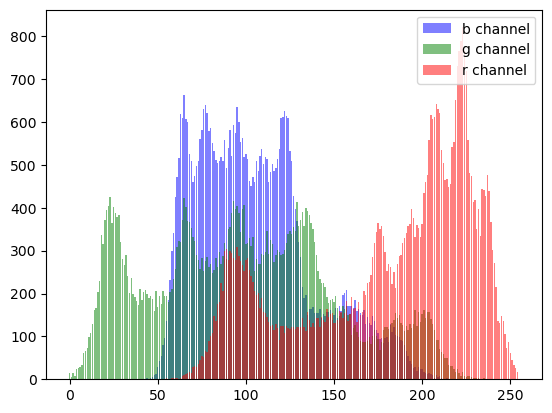

2025-03-21 19:10:15.915 python[15877:9365275] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-21 19:10:15.915 python[15877:9365275] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [5]:
# 영상의 histogram
src = cv2.imread("./fig/lenna.png", cv2.IMREAD_COLOR)

if src is None:
    print("Image read failed")
    sys.exit()

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256]) # calculate the histogram of the blue channel
hist_g = cv2.calcHist([src], [1], None, [256], [0, 255]) # calculate the histogram of the green channel
hist_r = cv2.calcHist([src], [2], None, [256], [0, 255]) # calculate the histogram of the red channel

plt.bar(np.arange(len(hist_b)), hist_b[:,0], color = "b", label = 'b channel', alpha = 0.5) 
plt.bar(np.arange(len(hist_g)), hist_g[:,0], color = "g", label = 'g channel', alpha = 0.5)
plt.bar(np.arange(len(hist_r)), hist_r[:,0], color = "r", label = 'r channel', alpha = 0.5)
plt.legend(loc='upper right')
plt.show()

cv2.imshow("lenna", src)
cv2.waitKey()
close_window()

### 영상 필터링

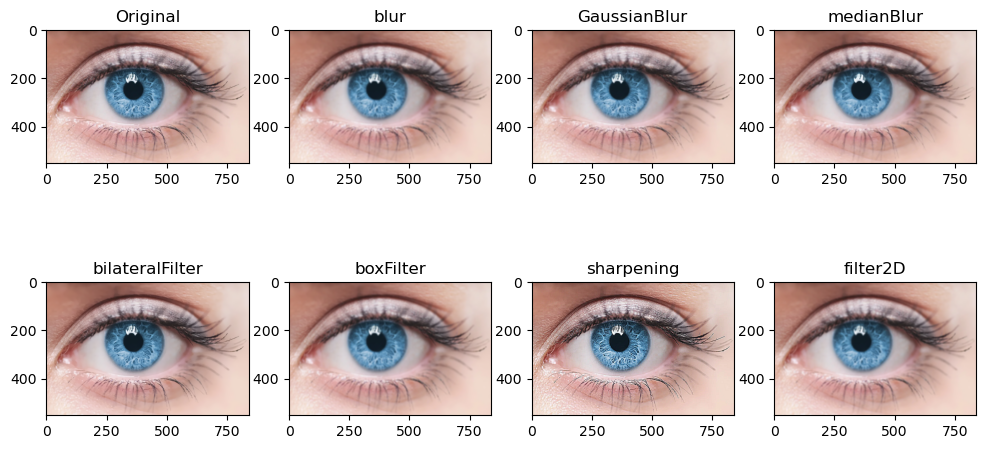

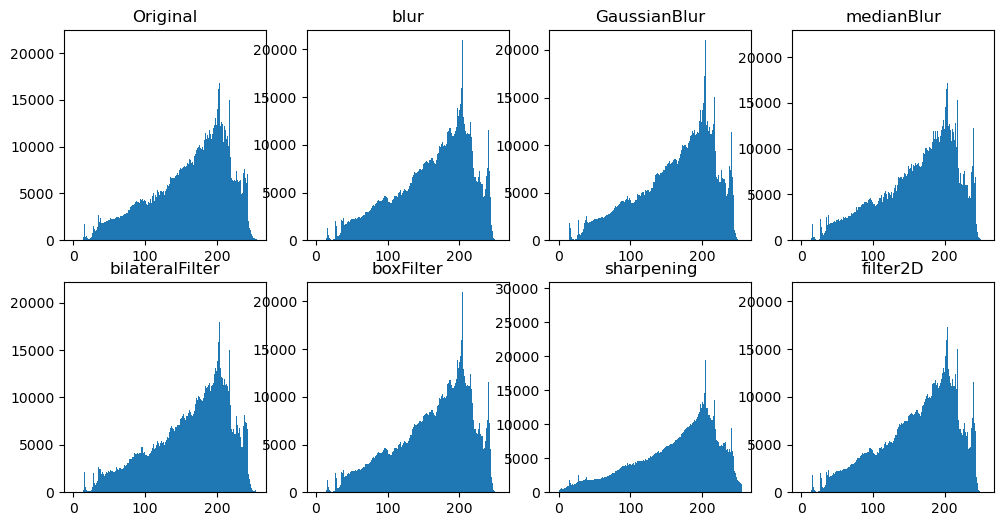

In [ ]:
## 영상을 필터링한다 = Convolution 한다
src = cv2.imread("./fig/blue_eyes.png")

# blur
dst1 = cv2.blur(src, (7, 7)) # Apply a mean filter
dst2 = cv2.GaussianBlur(src, (7, 7), 0) # Apply a Gaussian filter
dst3 = cv2.medianBlur(src, 7) # Apply a median filter
dst4 = cv2.bilateralFilter(src, -1, 10, 5) # Apply a bilateral filter
dst5 = cv2.boxFilter(src, -1, (7, 7), normalize=True) # Apply a box filter

# 샤프닝 필터 적용
sharpening = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
dst6 = cv2.filter2D(src, -1, sharpening)

dst7  = cv2.filter2D(src, -1, np.ones((7, 7), np.float32)/49) # Apply a filter, np.ones((7, 7), np.float32)/49 is a kernel


cv2.imshow("src", src)

# draw a table which has 4 rows and 2 columns
plt.figure(figsize=(12, 6))
plt.subplot(241), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(242), plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)), plt.title('blur')
plt.subplot(243), plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)), plt.title('GaussianBlur')
plt.subplot(244), plt.imshow(cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)), plt.title('medianBlur')
plt.subplot(245), plt.imshow(cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)), plt.title('bilateralFilter')
plt.subplot(246), plt.imshow(cv2.cvtColor(dst5, cv2.COLOR_BGR2RGB)), plt.title('boxFilter')
plt.subplot(247), plt.imshow(cv2.cvtColor(dst6, cv2.COLOR_BGR2RGB)), plt.title('sharpening')
plt.subplot(248), plt.imshow(cv2.cvtColor(dst7, cv2.COLOR_BGR2RGB)), plt.title('filter2D')
plt.show()

# draw a table which has 4 rows and 2 columns and display plot bars
# ravel() returns a 1-D array that contains all the elements of the original array
plt.figure(figsize=(12, 6))
plt.subplot(241), plt.hist(src.ravel(), 256, [0, 256]), plt.title('Original')      # draw a histogram
plt.subplot(242), plt.hist(dst1.ravel(), 256, [0, 256]), plt.title('blur')         # draw a histogram
plt.subplot(243), plt.hist(dst2.ravel(), 256, [0, 256]), plt.title('GaussianBlur') # draw a histogram
plt.subplot(244), plt.hist(dst3.ravel(), 256, [0, 256]), plt.title('medianBlur')   # draw a histogram
plt.subplot(245), plt.hist(dst4.ravel(), 256, [0, 256]), plt.title('bilateralFilter') # draw a histogram
plt.subplot(246), plt.hist(dst5.ravel(), 256, [0, 256]), plt.title('boxFilter')       # draw a histogram
plt.subplot(247), plt.hist(dst6.ravel(), 256, [0, 256]), plt.title('sharpening')      # draw a histogram
plt.subplot(248), plt.hist(dst7.ravel(), 256, [0, 256]), plt.title('filter2D') # draw a histogram
plt.show()


cv2.waitKey()
close_window()

